# Weather Prediction

Gerekli kütüphaneler eklenir

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Veri okunur. (İstanbul'a ait 2009-2019 yılları arası hava durumu verisi)

In [12]:
url = 'https://raw.githubusercontent.com/z-ozturk/python_weather_prediction/main/data/weather.csv'
df = pd.read_csv(url)

İlk birkaç satırı görüntüle:

In [5]:
print(df.head())

     DateTime             Condition  Rain  MaxTemp  MinTemp   SunRise  \
0  02.09.2019         Partly cloudy   0.0       27       22  06:32:00   
1  01.09.2019         Partly cloudy   0.0       27       22  06:31:00   
2  31.08.2019  Patchy rain possible   0.5       26       22  06:30:00   
3  30.08.2019         Partly cloudy   0.0       27       22  06:29:00   
4  29.08.2019         Partly cloudy   0.0       27       23  06:27:00   

     SunSet MoonRise   MoonSet  AvgWind  AvgHumidity  AvgPressure  
0  19:37:00  9:52:00  21:45:00       23           66         1012  
1  19:38:00  8:37:00  21:13:00       21           66         1011  
2  19:40:00  7:21:00  20:40:00       22           63         1015  
3  19:42:00   6:4:00   20:5:00       20           64         1016  
4  19:43:00  4:47:00  19:26:00       24           61         1015  


Veri setindeki sütunlar nelerdir?

In [6]:
print(df.columns)

Index(['DateTime', 'Condition', 'Rain', 'MaxTemp', 'MinTemp', 'SunRise',
       'SunSet', 'MoonRise', 'MoonSet', 'AvgWind', 'AvgHumidity',
       'AvgPressure'],
      dtype='object')


Hedef değişkenimiz olan MaxTemp'in hangi değişkenlerle ilişkisi olduğunu görmek üzere veriyi analiz edelim.

1. İstatiksel Özet: ortalama, min, max gibi sayısal özetleri verir

In [13]:
print(df.describe())

              Rain      MaxTemp      MinTemp      AvgWind  AvgHumidity  \
count  3896.000000  3896.000000  3896.000000  3896.000000  3896.000000   
mean      0.946794    18.084189    13.774897    16.989220    71.414784   
std       2.558308     7.613318     6.865021     7.950417     9.483500   
min       0.000000    -3.000000    -5.000000     2.000000    40.000000   
25%       0.000000    12.000000     8.000000    11.000000    65.000000   
50%       0.010000    18.000000    14.000000    16.000000    71.000000   
75%       0.720000    25.000000    20.000000    22.000000    78.000000   
max      42.000000    37.000000    26.000000    56.000000    97.000000   

       AvgPressure  
count  3896.000000  
mean   1015.281314  
std       6.284232  
min     992.000000  
25%    1011.000000  
50%    1015.000000  
75%    1019.000000  
max    1038.000000  


2. Korelasyon Matrisi

In [15]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                 Rain   MaxTemp   MinTemp   AvgWind  AvgHumidity  AvgPressure
Rain         1.000000 -0.144952 -0.123754  0.155156     0.278792    -0.153274
MaxTemp     -0.144952  1.000000  0.946626 -0.140458    -0.469191    -0.436150
MinTemp     -0.123754  0.946626  1.000000 -0.047940    -0.371696    -0.399119
AvgWind      0.155156 -0.140458 -0.047940  1.000000     0.201916     0.076457
AvgHumidity  0.278792 -0.469191 -0.371696  0.201916     1.000000    -0.013038
AvgPressure -0.153274 -0.436150 -0.399119  0.076457    -0.013038     1.000000


MaxTemp ile MinTemp: Çok yüksek pozitif korelasyon. Max ve Min sıcaklıklar birlikte artıyor.
MaxTemp ile Avg Humidity: Orta şiddette negatif korelasyon. Nem arttıkça sıcaklık düşüyor gibi.
MaxTemp ile AvgPressure: Benzer şekilde negatif korelasyon. Yüksek basınçlarda sıcaklık biraz düşebilir.
MaxTemp ile AvgWind ve Rain: Zayıf negatif korelasyonlar, yani rüzgar ve yağış sıcaklığı biraz düşürebilir ama etkisi düşük.

MaxTemp değerini tahmin etmek için, etkisi yüksek olan MinTemp, AvgHumidity ve AvgPressure sütunlarını kullanacağız. İhtiyacımız olan sütunları seçelim

In [17]:
df = df[['DateTime', 'MaxTemp', 'MinTemp', 'AvgHumidity', 'AvgPressure']]

Tarih sütununu datetime'a çevirip indeks yapalım

In [18]:
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)
df.set_index('DateTime', inplace=True)

Her sütunda kaç tane eksik veri olduğunu kontrol edelim

In [19]:
print(df.isnull().sum())

MaxTemp        0
MinTemp        0
AvgHumidity    0
AvgPressure    0
dtype: int64


Özellikler ve hedefi belirleyelim

In [20]:
X = df[['MinTemp', 'AvgHumidity', 'AvgPressure']]
y = df['MaxTemp']

Veriyi train/test olarak bölelim (%80 eğitim, %20 test)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lineer regresyon modeli oluşturup ve eğitelim

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Test verisi üzerinde tahmin yapalım

In [23]:
y_pred = model.predict(X_test)

İlk 10 tahmin ve gerçek değerleri karşılaştırabiliriz

In [24]:
comparison = pd.DataFrame({'Gerçek': y_test, 'Tahmin': y_pred})
print(comparison.head(10))

            Gerçek     Tahmin
DateTime                     
2009-08-01      29  24.361027
2017-03-04      13  11.451723
2018-10-16      20  19.315147
2013-12-04       9  10.259476
2015-08-14      30  28.180038
2018-09-01      30  28.511926
2014-06-26      28  28.304277
2015-07-22      28  26.130535
2012-06-26      27  26.813413
2011-01-12      11  12.308978


Performans Ölçümleri:

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"R Kare (R²) Skoru: {r2:.2f}")

Ortalama Kare Hata (MSE): 5.04
R Kare (R²) Skoru: 0.92


Modelin tahminlerini görselleştirelim:

1. Gerçek vs. Tahmin Değerleri

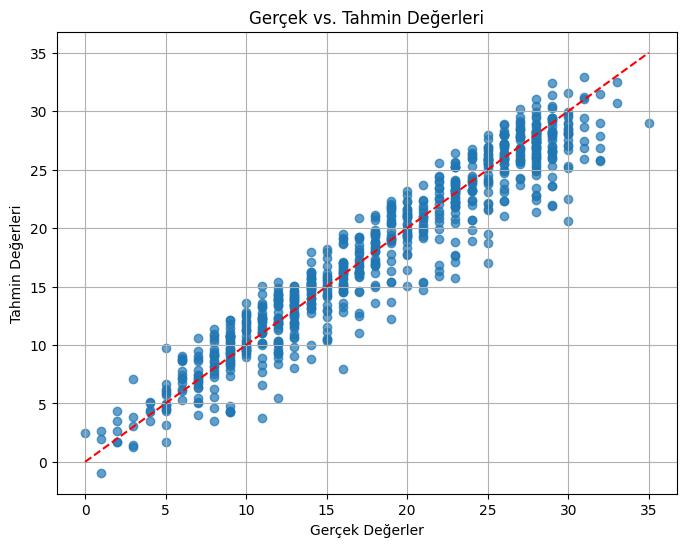

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Doğrusal referans çizgisi
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Gerçek vs. Tahmin Değerleri')
plt.grid(True)
plt.show()


2. Hata (Fark) Grafiği

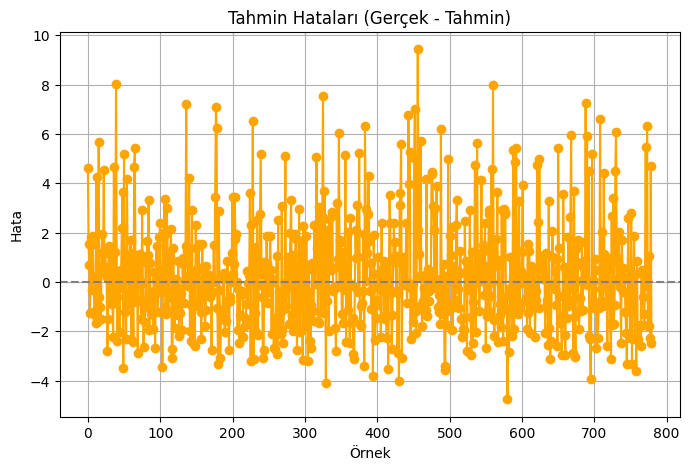

In [27]:
fark = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.plot(fark.values, marker='o', linestyle='-', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Tahmin Hataları (Gerçek - Tahmin)')
plt.xlabel('Örnek')
plt.ylabel('Hata')
plt.grid(True)
plt.show()


3. Histogram: Hataların Dağılımı

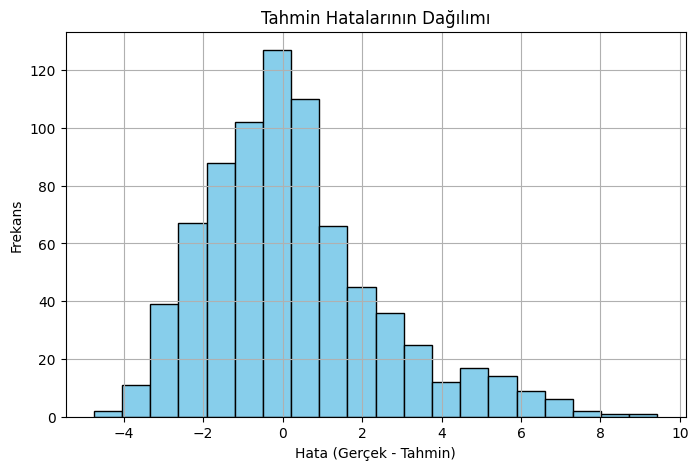

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(fark, bins=20, edgecolor='black', color='skyblue')
plt.title('Tahmin Hatalarının Dağılımı')
plt.xlabel('Hata (Gerçek - Tahmin)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()
